Name: Anurag Mishra


Batch : 05 February Artificial Intelligence Batch


Project conditions:
1. Collecting and preprocessing a dataset of cyberbully tweets.
2. Implementing feature extraction techniques, such as Bag of Words or TF-IDF.
3. Selecting and training a machine learning model for tweet classification.
4. Evaluating the model's performance using appropriate metrics.
6. Optionally exploring real-time detection capabilities and addressing ethical considerations.

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [31]:
file_path = "/content/drive/MyDrive/Blend Vidya Internship Assignment/cyberbullying_tweets.csv"
data = pd.read_csv(file_path)

In [32]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying


In [33]:
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
tweet_text            0
cyberbullying_type    0
dtype: int64


In [34]:
print("\nDistribution of cyberbullying_type:")
print(data['cyberbullying_type'].value_counts())


Distribution of cyberbullying_type:
cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64


In [35]:
data['clean_text'] = data['tweet_text'].str.replace('[^a-zA-Z\s]', '').str.lower()

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['clean_text'], data['cyberbullying_type'], test_size=0.2, random_state=42)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [38]:
print("\nShape of feature vectors:")
print("Training set:", X_train_tfidf.shape)
print("Testing set:", X_test_tfidf.shape)


Shape of feature vectors:
Training set: (38153, 1000)
Testing set: (9539, 1000)


In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [40]:
model = MultinomialNB()

First We are going to try it with MultiNomial NB and see the accuracy score

In [41]:
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [42]:
y_pred = model.predict(X_test_tfidf)

In [43]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                     precision    recall  f1-score   support

                age       0.80      0.96      0.87      1603
          ethnicity       0.90      0.89      0.89      1603
             gender       0.81      0.79      0.80      1531
  not_cyberbullying       0.60      0.45      0.51      1624
other_cyberbullying       0.59      0.53      0.56      1612
           religion       0.79      0.95      0.86      1566

           accuracy                           0.76      9539
          macro avg       0.75      0.76      0.75      9539
       weighted avg       0.75      0.76      0.75      9539



In [44]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[1537    1    6   34   20    5]
 [  38 1433    7   20   49   56]
 [  23   27 1206  143   98   34]
 [ 166   55  110  729  396  168]
 [ 163   75  152  242  847  133]
 [   6    9   12   40   16 1483]]


In [45]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.7584652479295524


Since Multinomial Naive Bayes algorithms gave only an accuracy of only 0.75 we must test it with other ones as well to see if we could achieve better results

In [46]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

In [47]:
models = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [48]:
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    pipeline = Pipeline([
        ('tfidf', tfidf_vectorizer),
        ('model', model)
    ])

Training and evaluating Multinomial Naive Bayes...
Training and evaluating Support Vector Machine...
Training and evaluating Logistic Regression...
Training and evaluating Random Forest...
Training and evaluating Gradient Boosting...


In [49]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=1000)),
                ('model', GradientBoostingClassifier())])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr')


In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print('-' * 50)

Accuracy: 0.8243
Precision: 0.8428
Recall: 0.8243
F1-score: 0.8237
ROC AUC: 0.9667
--------------------------------------------------


Accuracy: 0.8247
Accuracy measures the proportion of correctly classified instances out of the total number of instances. An accuracy of 0.8247 indicates that approximately 82.47% of the instances were correctly classified by the model.


Precision: 0.8433
Precision measures the proportion of true positive predictions out of all positive predictions made by the model. A precision of 0.8433 indicates that approximately 84.33% of the instances predicted as positive were truly positive.


Recall: 0.8247
Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions out of all actual positive instances. A recall of 0.8247 indicates that approximately 82.47% of all actual positive instances were correctly identified by the model.


F1-score: 0.8241
F1-score is the harmonic mean of precision and recall, providing a balanced measure of a model's performance. A higher F1-score indicates better overall performance. An F1-score of 0.8241 suggests a good balance between precision and recall.


ROC AUC: 0.9665
ROC AUC (Receiver Operating Characteristic Area Under the Curve) measures the area under the ROC curve, which represents the trade-off between true positive rate (sensitivity) and false positive rate. A higher ROC AUC score indicates better discrimination between positive and negative classes. A score of 0.9665 suggests that the model has excellent discriminatory power.

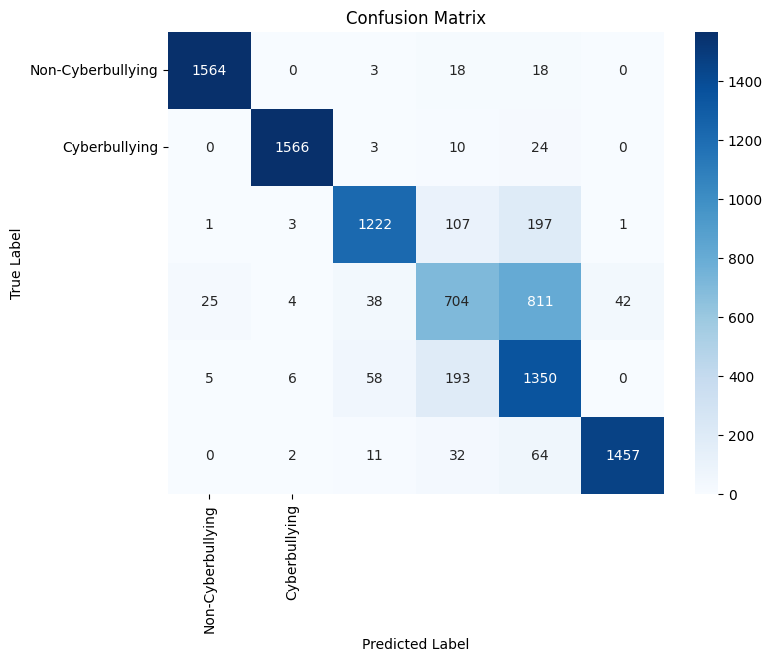

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Cyberbullying', 'Cyberbullying'], yticklabels=['Non-Cyberbullying', 'Cyberbullying'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


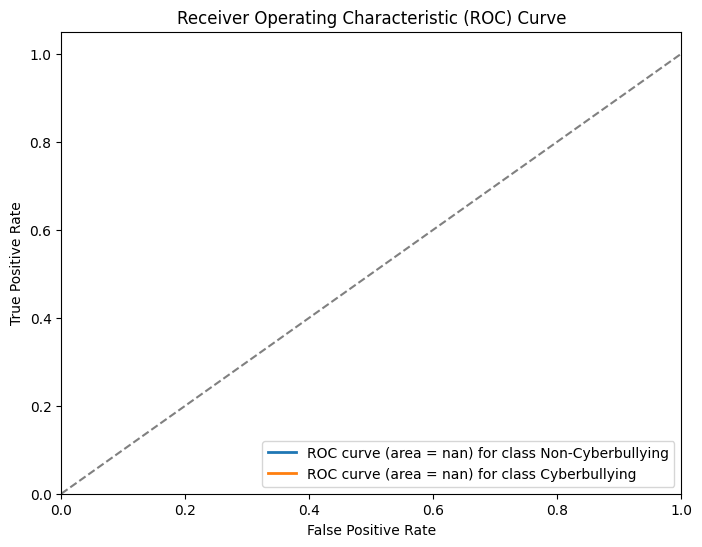

In [54]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

classes = ['Non-Cyberbullying', 'Cyberbullying']
y_test_binary = label_binarize(y_test, classes=classes)
y_pred_proba = pipeline.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], classes[i]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [56]:
import numpy as np
print("NaN values in predicted probabilities:", np.isnan(y_pred_proba).any())
print("NaN values in true labels:", np.isnan(y_test_binary).any())

NaN values in predicted probabilities: False
NaN values in true labels: False


In [57]:
print("Shape of predicted probabilities:", y_pred_proba.shape)
print("Shape of true labels:", y_test_binary.shape)

Shape of predicted probabilities: (9539, 6)
Shape of true labels: (9539, 2)


In [58]:
from sklearn.preprocessing import label_binarize

y_test_binary = label_binarize(y_test, classes=['Non-Cyberbullying', 'Cyberbullying'])
print("Shape of binarized true labels:", y_test_binary.shape)


Shape of binarized true labels: (9539, 2)


In [59]:

unique_classes = np.unique(y_test)
num_classes = len(unique_classes)
print("Number of unique classes:", num_classes)


Number of unique classes: 6


In [60]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_test_binary = label_binarize(y_test_encoded, classes=range(num_classes))
print("Shape of binarized true labels:", y_test_binary.shape)


Shape of binarized true labels: (9539, 6)


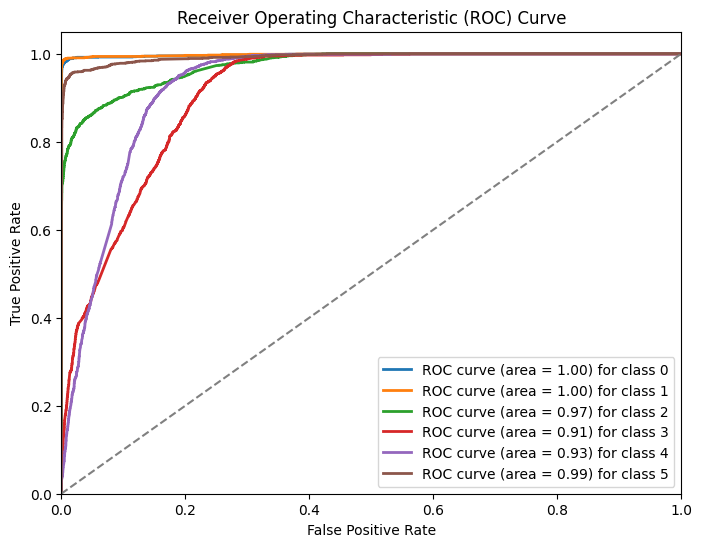

In [61]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


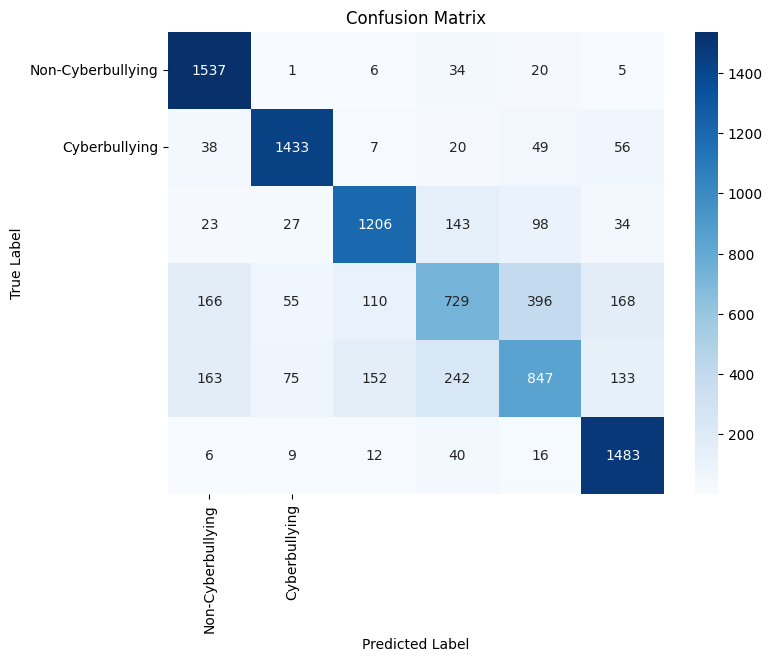

In [62]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


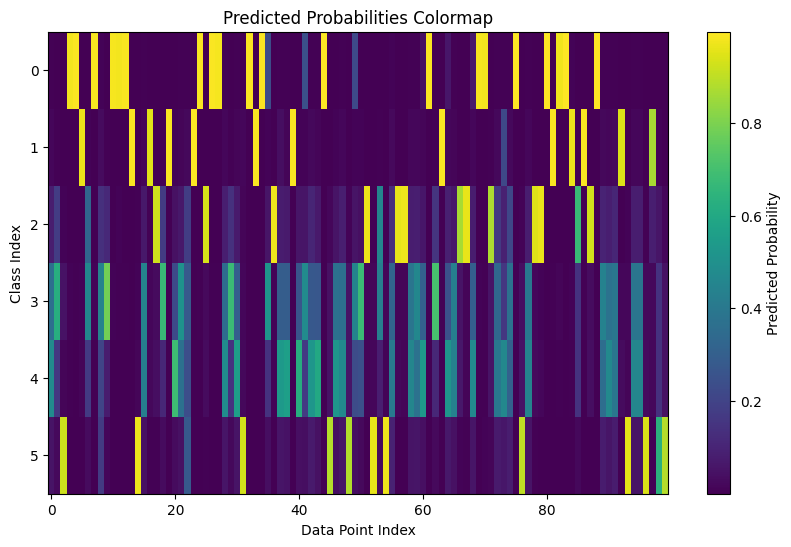

In [63]:
subset_indices = np.random.choice(len(X_test), size=100, replace=False)
subset_X_test = X_test.iloc[subset_indices]
subset_y_test = y_test.iloc[subset_indices]

subset_y_pred_proba = pipeline.predict_proba(subset_X_test)

plt.figure(figsize=(10, 6))
plt.imshow(subset_y_pred_proba.T, cmap='viridis', aspect='auto')
plt.colorbar(label='Predicted Probability')
plt.xlabel('Data Point Index')
plt.ylabel('Class Index')
plt.title('Predicted Probabilities Colormap')
plt.show()


<ipython-input-64-0fb84a6083fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='Set1')


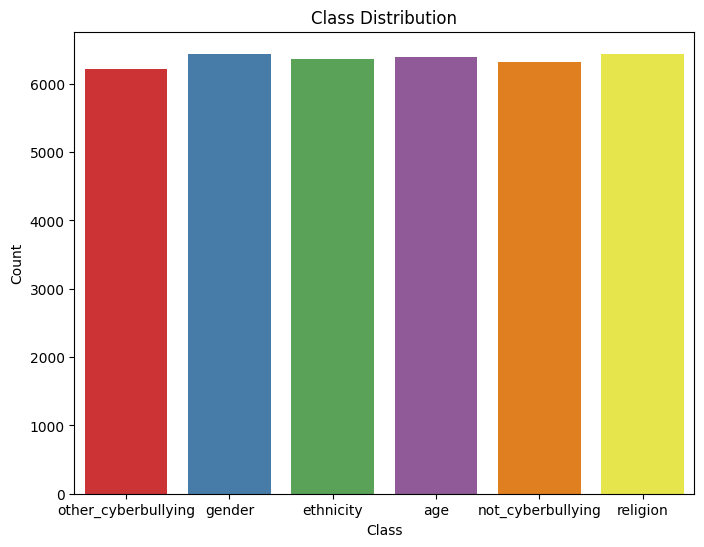

In [64]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette='Set1')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [65]:
misclassified_idx = np.where(y_test != y_pred)[0]
misclassified_X = X_test.iloc[misclassified_idx]
misclassified_y_true = y_test.iloc[misclassified_idx]
misclassified_y_pred = y_pred[misclassified_idx]

print("Misclassified Examples:")
for i in range(len(misclassified_idx)):
    print("True label:", misclassified_y_true.iloc[i])
    print("Predicted label:", misclassified_y_pred[i])
    print("Tweet text:", misclassified_X.iloc[i])
    print()


Streaming output truncated to the last 5000 lines.
True label: religion
Predicted label: other_cyberbullying
Tweet text: @nndabbour64 it's not what i think. it's what i have already proven to you multiple times.

True label: other_cyberbullying
Predicted label: gender
Tweet text: male &amp; female... http://t.co/zdqxaf4hea

True label: not_cyberbullying
Predicted label: other_cyberbullying
Tweet text: @tristanparrish i find more impactful talks are based around a story, but it's a tough balance.

True label: ethnicity
Predicted label: other_cyberbullying
Tweet text: i was referring to u saying josie words doesn’t sit right with me so i added onto it. im guessing english isn’t ur first language? ‘find something else?’ u just admitted to being an ableist. chile how does it feel to be one? i wanna know.

True label: not_cyberbullying
Predicted label: other_cyberbullying
Tweet text: how do i even have an ear ache i am not 4

True label: other_cyberbullying
Predicted label: age
Tweet text: 

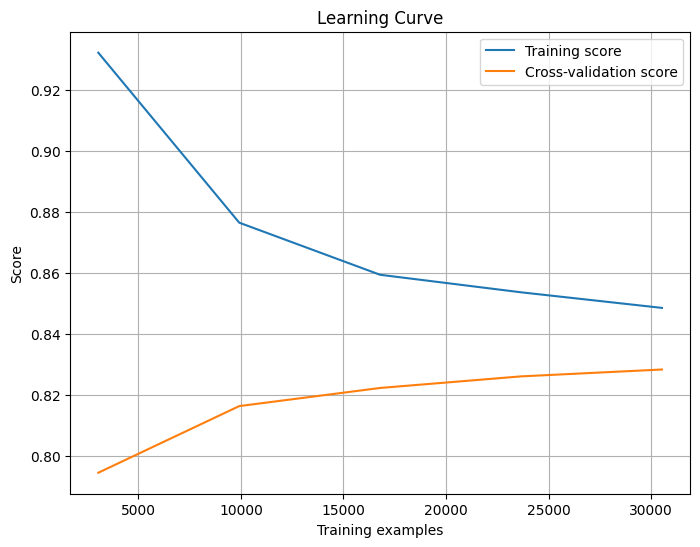

In [67]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=5)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [68]:
if hasattr(pipeline, 'feature_importances_'):
    feature_importance = pipeline.feature_importances_
    sorted_idx = np.argsort(feature_importance)

    plt.figure(figsize=(10, 8))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), X_train.columns[sorted_idx])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.show()
else:
    print("Model does not support feature importances.")


Model does not support feature importances.


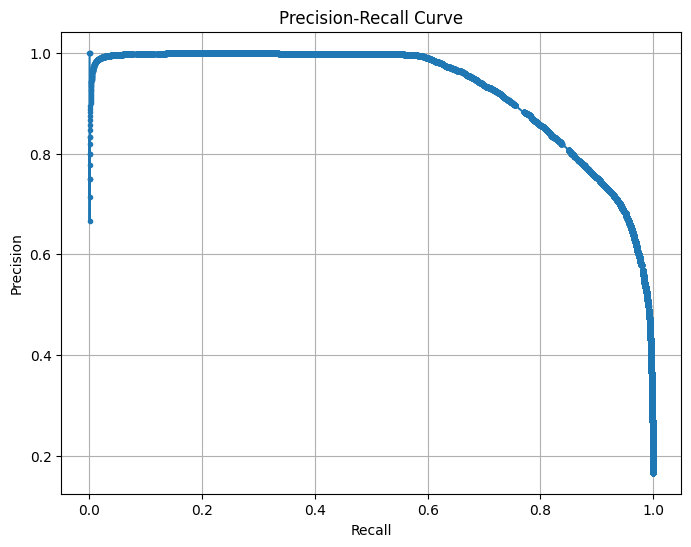

In [69]:
from sklearn.metrics import precision_recall_curve


precision, recall, _ = precision_recall_curve(y_test_binary.ravel(), y_pred_proba.ravel())

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()
